In [1]:
from autoencoders import VanillaVAE, LightningAutoEncoder
from utils import BoidImagesDataset, train_transform

import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import lightning as L

In [2]:
train_dataset = ImageFolder('boid_data', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)

In [3]:
vae = VanillaVAE(3, 100)
lightning_model = LightningAutoEncoder(vae)

In [4]:
trainer = L.Trainer(max_time={'hours': 3})
trainer.fit(lightning_model, train_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\dh99\Desktop\GNN\.venv\lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_

Epoch 494:  80%|████████  | 803/1000 [00:17<00:04, 46.87it/s, v_num=17] 

Time limit reached. Elapsed time is 3:00:00. Signaling Trainer to stop.


Epoch 494:  80%|████████  | 804/1000 [00:17<00:04, 46.30it/s, v_num=17]


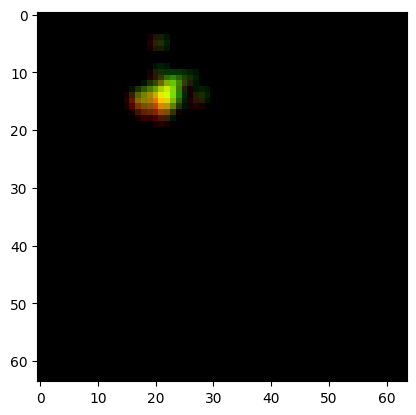

ValueError: expected 4D input (got 3D input)

In [5]:
from utils import displayTensorImage, valid_transform
import matplotlib.pyplot as plt

valid_dataset = ImageFolder('boid_data', transform=train_transform)

vae.to('cpu')
for img, _ in valid_dataset:
    displayTensorImage(img, plt)
    plt.show()

    mu, var = vae.encode(img)
    recon = vae.decode(mu)
    displayTensorImage(recon.reshape(3, 64, 64), plt)
    plt.show()